# import the library that we need 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime as dt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import timeit
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [2]:
# importing dataset and read it
database = 'C:\\Users\\Lenovo\\Downloads\\datasets\\database.sqlite'
conn = sqlite3.connect(database)

In [3]:
#connent to datasets and pick up the table that we need
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
print("Connection Successful",conn)

Connection Successful <sqlite3.Connection object at 0x000001AB1D4E1730>


In [109]:
# df for examination 1 and 2  and df3 for the third scenario
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

df3 = pd.read_sql_query("SELECT * FROM Match" , conn)


In [5]:
# check our column 
print("df3 shape is:",df3.shape)
print("df shape is:",df.shape)


df3 shape is: (25979, 115)
df shape is: (183978, 42)


In [6]:
# a owerview of our dataset 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [7]:
# a owerview of our dataset 
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


## cleaning data 

In [16]:
# find any null value 
df.isna().any().any()

True

In [110]:
# drop missing value 
df = df.dropna()

In [18]:
df.isnull().sum().any()

False

In [111]:
# to check how many rows was removed for cleaning data
df.shape

(180354, 42)

In [20]:
# converting data to numerical value

foot = df['preferred_foot']

p = {'right':0, 'left':1}
df['preferred_foot'] = df['preferred_foot'].map(p)

In [21]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,0,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,0,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,0,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,0,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,0,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [22]:
# removed some labeled data that meaningless 
df.loc[~(df['attacking_work_rate'].isin(['medium','high','low'])\
         
                       | df['defensive_work_rate'].isin(['medium','high','low'])),:].shape


(3734, 42)

In [23]:
df_updated = df.loc[(df['attacking_work_rate'].\
                                                  isin(['medium','high','low'])\
                       & df['defensive_work_rate'].isin(['medium','high','low'])),:]
df_updated.shape

(176161, 42)

In [24]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,0,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,0,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,0,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,0,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,0,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


# Corrolation 

In [25]:
# corolation test 
df_corr = df.drop(["id","player_fifa_api_id", "player_api_id","date", "attacking_work_rate","defensive_work_rate" ], axis=1) 
corrolation = df_corr.corr()
corrolation

,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,1.000000,0.765435,0.001417,0.357320,0.330079,0.313324,0.458243,0.361739,0.354191,0.357566,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.765435,1.000000,0.003513,0.277284,0.287838,0.206063,0.382538,0.301678,0.339978,0.296050,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
preferred_foot,0.001417,0.003513,1.000000,0.174033,-0.012004,0.004765,0.073302,0.011572,0.083831,0.128510,...,0.039395,0.016476,0.095221,0.091167,0.098139,-0.074524,-0.077679,-0.044258,-0.075666,-0.075233
crossing,0.357320,0.277284,0.174033,1.000000,0.576896,0.368956,0.790323,0.637527,0.809747,0.788924,...,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,0.330079,0.287838,-0.012004,0.576896,1.000000,0.373459,0.580245,0.851482,0.784988,0.691082,...,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,0.313324,0.206063,0.004765,0.368956,0.373459,1.000000,0.548435,0.391129,0.400803,0.320384,...,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,0.458243,0.382538,0.073302,0.790323,0.580245,0.548435,1.000000,0.639995,0.788935,0.731948,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,0.361739,0.301678,0.011572,0.637527,0.851482,0.391129,0.639995,1.000000,0.784247,0.752410,...,0.690716,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267
dribbling,0.354191,0.339978,0.083831,0.809747,0.784988,0.400803,0.788935,0.784247,1.000000,0.810353,...,0.734119,0.663420,0.004345,0.067306,0.044988,-0.654097,-0.650645,-0.432452,-0.653560,-0.656195
curve,0.357566,0.296050,0.128510,0.788924,0.691082,0.320384,0.731948,0.752410,0.810353,1.000000,...,0.728198,0.649737,0.032956,0.094466,0.080110,-0.556625,-0.544940,-0.333784,-0.549870,-0.551574


In [26]:
# Data visualasiton
correlation_matrix  = df.corr()
correlation_matrix["overall_rating"].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.771856
potential             0.765435
short_passing         0.458243
ball_control          0.443991
long_passing          0.434525
vision                0.431493
shot_power            0.428053
penalties             0.392715
long_shots            0.392668
positioning           0.368978
volleys               0.361739
curve                 0.357566
crossing              0.357320
dribbling             0.354191
free_kick_accuracy    0.349800
finishing             0.330079
stamina               0.325606
aggression            0.322782
strength              0.315684
heading_accuracy      0.313324
jumping               0.258978
sprint_speed          0.253048
interceptions         0.249094
acceleration          0.243998
agility               0.239963
standing_tackle       0.163986
balance               0.160211
marking               0.132185
sliding_tackle        0.128054
gk_kicking            0.028799
gk_diving             0.027675
gk_posit

In [27]:
# Heatmap to show the corrolation 
corr1 = df_corr.select_dtypes(include =['float64','int64']).\
loc[:,df_corr.select_dtypes(include =['float64','int64']).columns[3:]].corr()

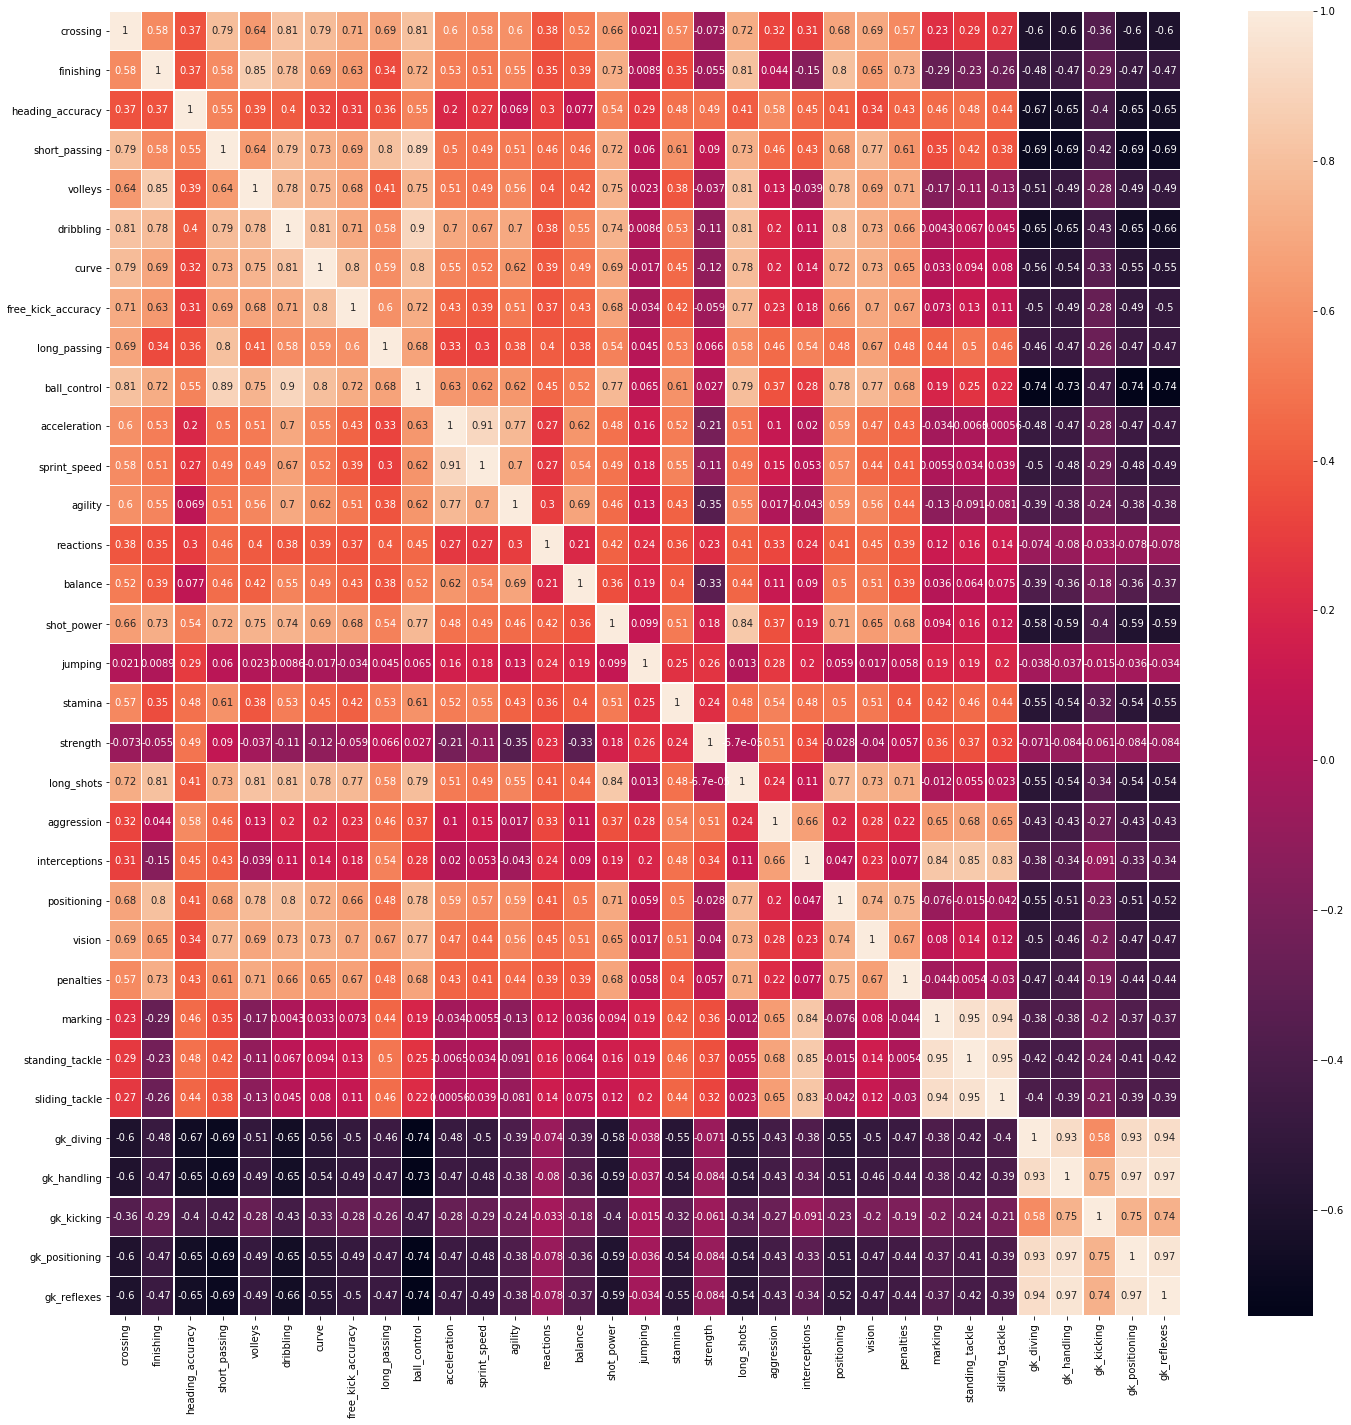

In [28]:
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=24,h=24)
sns.heatmap(corr1,annot = True,linewidths=0.5,ax = ax2)

In [29]:
df2 = df.copy(deep=True)
df2 = df.drop(["player_fifa_api_id","player_api_id",'date',"attacking_work_rate","defensive_work_rate","preferred_foot", "id"   ], axis=1)
columns = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']


In [30]:
correlations = [ df2['overall_rating'].corr(df2[f]) for f in columns ]
len(columns),len(correlations)

(34, 34)

In [31]:
# the line graph to show correlation between overall_rating and other attributs
# from matplotlib.pyplot import figure
from pylab import rcParams

def plot_df_corrolation(df2, y_label):
     color = "Blue"
     fig = plt.gcf
    
     plt.ylabel(y_label)
     rcParams['figure.figsize'] = 10, 3
     ax = df2.correlation.plot(linewidth= 3.5, color = color)
     ax.set_xticks(df2.index)
     ax.set_xticklabels(df2.attributes, rotation=75); 
     plt.show()

In [32]:
df1 = pd.DataFrame({'attributes': columns, 'correlation': correlations})

#df1 = df1[1:36]
df1["correlation"].sort_values(ascending=False,ignore_index= True).head(6)


0    0.771856
1    0.765435
2    0.458243
3    0.443991
4    0.434525
5    0.431493
Name: correlation, dtype: float64

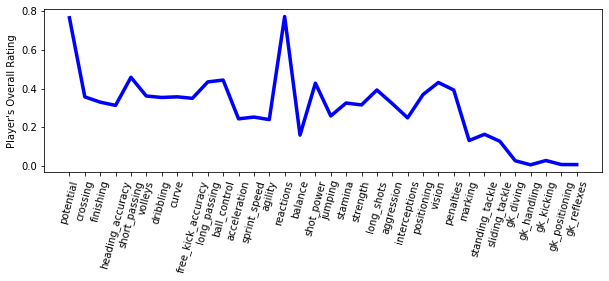

In [52]:


plot_df_corrolation(df1, 'Player\'s Overall Rating')
#plt.xkcd()

# Visualasation


In [34]:
players_data = df_updated.copy(deep=True)
players_data = players_data.drop(["date"], axis=1)


[Text(0, 0.5, 'Percentage'), Text(0.5, 1.0, 'Defensive Rate')]

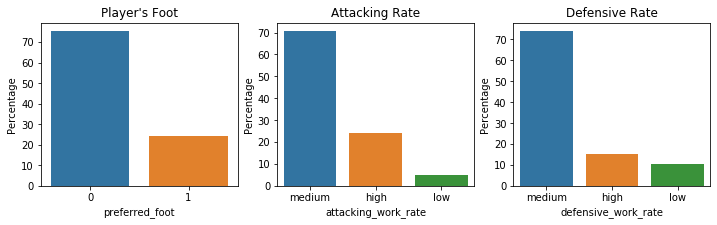

In [35]:
# creating plot to show a overview of foot preferer and attackinf and defensive work 

fig1, ax1 = plt.subplots(nrows = 1, ncols= 3)
fig1.set_size_inches(12,3)
sns.barplot(x ='preferred_foot', y = 'preferred_foot', data = players_data,\
             estimator = lambda x: len(x)/len(players_data) * 100, ax = ax1[0],\
            orient = 'v')
ax1[0].set(ylabel = 'Percentage', title = "Player's Foot")


sns.barplot(x= "attacking_work_rate", y = "attacking_work_rate", data= players_data,\
            estimator = lambda x: len(x)/len(players_data)*100, ax = ax1[1],\
            orient = "v")
ax1[1].set( ylabel = "Percentage", title = 'Attacking Rate')


sns.barplot(x= "defensive_work_rate", y = "defensive_work_rate", data= players_data,\
            estimator = lambda x: len(x)/len(players_data)*100, ax = ax1[2],\
            orient = "v")
ax1[2].set( ylabel = "Percentage", title = 'Defensive Rate')

In [33]:
  def plot_beatiful_quantiles(players_data):
      points = np.linspace(0.00,1.0, 100)
      quantiles = []
      for i in points:
          quantiles.append(players_data["overall_rating"].quantile(i))
      fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
      subplot = fig.add_subplot(111)
      subplot.tick_params(axis='both', which='major', labelsize=22)
      subplot.plot(quantiles,points, color="red", linewidth=2.5, linestyle="-")
      plt.xlabel('Fifa rating', fontsize=30)
      plt.ylabel('Percent of football players', fontsize=30)
      plt.show()
    
 plot_beatiful_quantiles(players_data)

In [36]:
players_data2 =  pd.read_sql_query("SELECT * FROM Player", conn)

def get_age_for_football_players(x):
    date  =  x.split(" ")[0]
    today = datetime.datetime.strptime("2015-01-01", "%Y-%m-%d").date()
    born = datetime.datetime.strptime(date, "%Y-%m-%d").date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))





##Distribution of Overall Rating

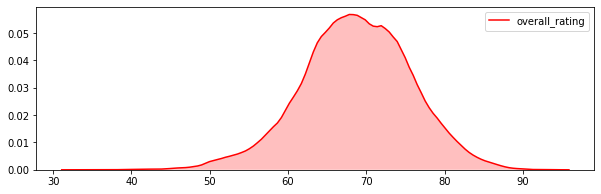

In [38]:
sns.kdeplot(players_data.overall_rating, shade=True, color="r")


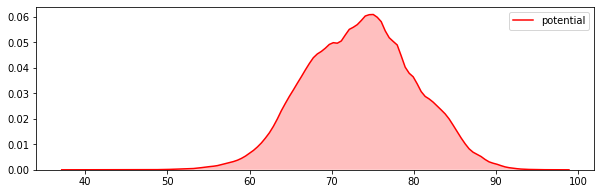

In [40]:
sns.kdeplot(players_data.potential, shade=True, color="r")

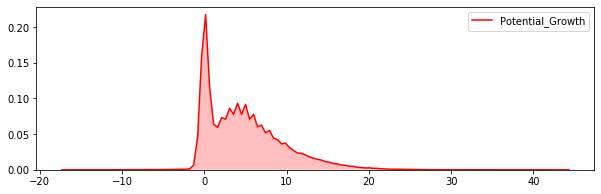

In [41]:
players_data["Potential_Growth"] = (players_data.potential) -  (players_data.overall_rating)
sns.kdeplot(players_data.Potential_Growth, shade=True, color="r")

In [46]:

# player_data_updated = players_data.loc[(players_data['attacking_work_rate'].\
#                                                   isin(['medium','high','low'])\
#                        & players_data['defensive_work_rate'].isin(['medium','high','low'])),:]
# print(player_att_table_updated1.shape)
# player_att_table_updated1.head()

(176161, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [42]:
# df3 = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
# player_att_table_updated1 = df3.loc[(df3['attacking_work_rate'].\
#                                                   isin(['medium','high','low'])\
#                        & df3['defensive_work_rate'].isin(['medium','high','low'])),:]

# pat = player_att_table_updated1.loc[:,player_att_table_updated1.columns.tolist()[3:]]

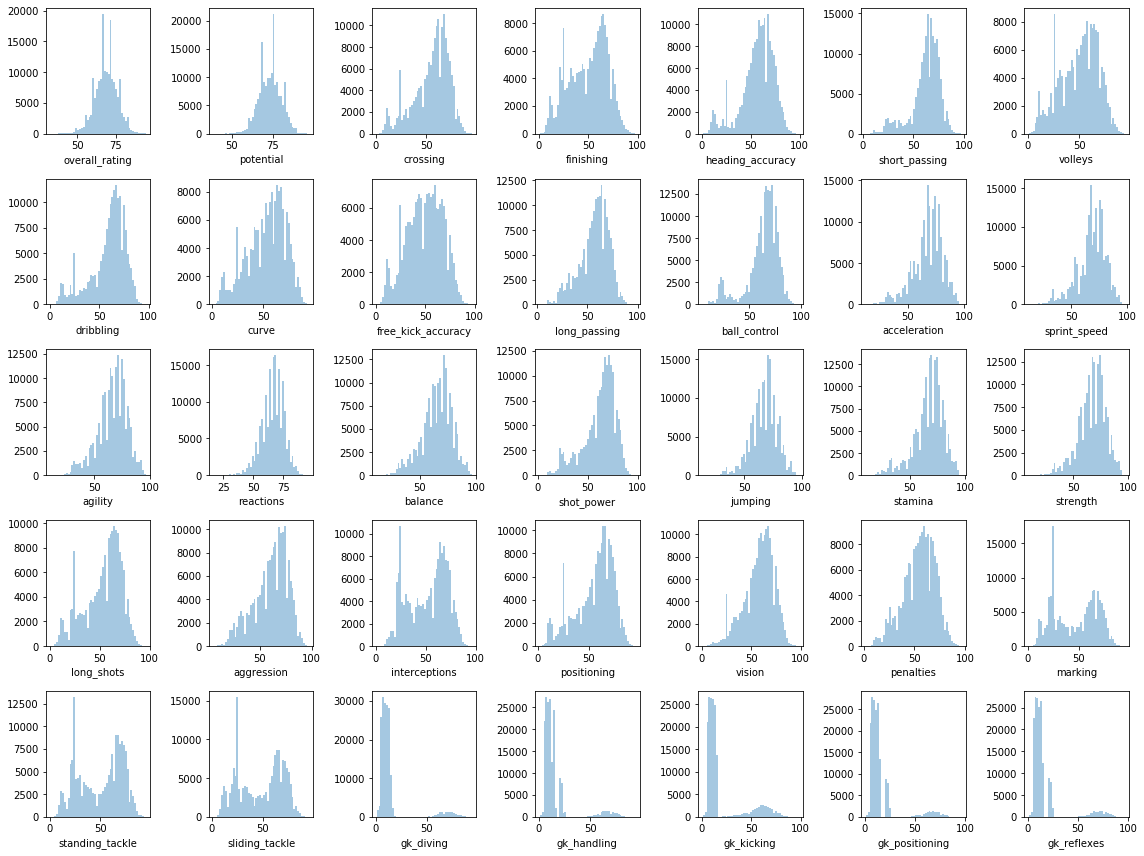

In [43]:
fig2, ax2 = plt.subplots(nrows=5,ncols=7)
fig2.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.distplot(pat.loc[:,j],kde = False,hist = True, ax = ax2[int(i/7)][i%7])
fig2.tight_layout()
    

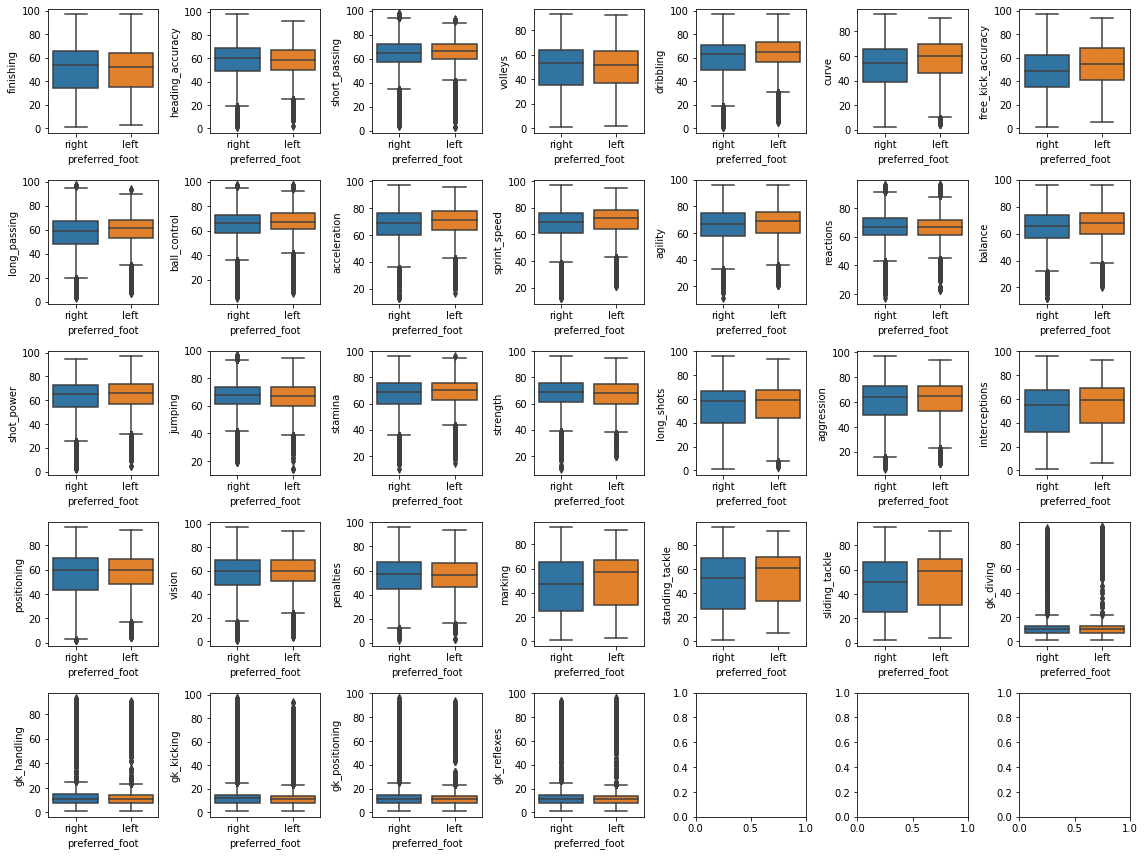

In [44]:
fig6, ax6 = plt.subplots(nrows=5,ncols=7)
fig6.set_size_inches(16,12)
for i,j in enumerate(df2.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "preferred_foot", y = j, data= pat, ax = ax6[int(i/7)][i%7])
fig6.tight_layout()

# First scenario

This study intends to uncover some players' skills that have a high association with overall rating and group them into comparable groups based on these characteristics. What if we could group players with 5 or 6 skills together and predict their groups only based on these skills? The first problem we encountered was determining how many groups are eligible for clustering. I used the Kmeans machine learning algorithm and the elbow approach to find the optimal number of clusters for the dataset to achieve this requirement.


In [48]:
df_K = df.copy(deep = True)
df_K.shape

(180354, 42)

In [49]:
# features that we selected to cluster our player based on it
fetures_selected = ["gk_kicking", 'potential', 'marking', 'standing_tackle', 'interceptions']
fetures_selected2 = ['potential','reactions',"gk_kicking",'standing_tackle',"vision"]
fetures_selected3 = ["potential","gk_kicking",'standing_tackle','ball_control','heading_accuracy' ]

In [50]:
target = df_K["overall_rating"]
X = df_K[fetures_selected].values
y = target

### Elbow Method 
in this method we can pich up the optimal number for k in the k-means which is really importance to reach a perfect model.

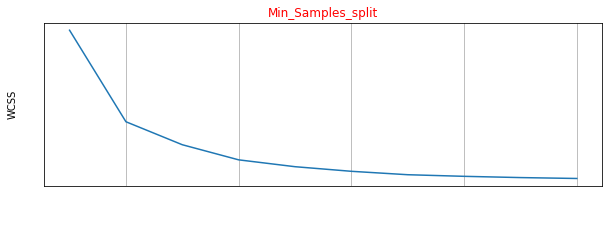

In [51]:
from sklearn.cluster import KMeans
#finding obtimising number for clustering
wcss = []

for i in range(1,11):

    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.tick_params(axis='x', colors='white') 
plt.tick_params(axis='y', colors='white')
plt.title("Min_Samples_split", color = "Red")
plt.grid(axis = 'x')
plt.xlabel('min_samples_split', color= "white")
plt.show()

In [53]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_model = KMeans(n_clusters = 4, init = 'k-means++',).fit(X)

In [54]:
y_kmeans = kmeans_model.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 2, 2, 2])

In [55]:
pd.value_counts(kmeans_model.labels_, sort=False)

0    84482
1    59752
2    21357
3    14763
dtype: int64

In [58]:

from sklearn.metrics import accuracy_score
score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
score

0.5369654044195145

In [60]:
#Applying kmeans to the dataset / Creating the kmeans classifier

kmeans_model = KMeans(n_clusters = 3, init = 'k-means++',).fit(X)
y_kmeans = kmeans_model.fit_predict(X)

In [61]:
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

In [62]:
pd.value_counts(kmeans_model.labels_, sort=False)

0    59978
1    95426
2    24950
dtype: int64

In [63]:
X_std = StandardScaler().fit_transform(X)

## implementing the Silhouette plot to analysis our model function

Time:  1352.4724073000002


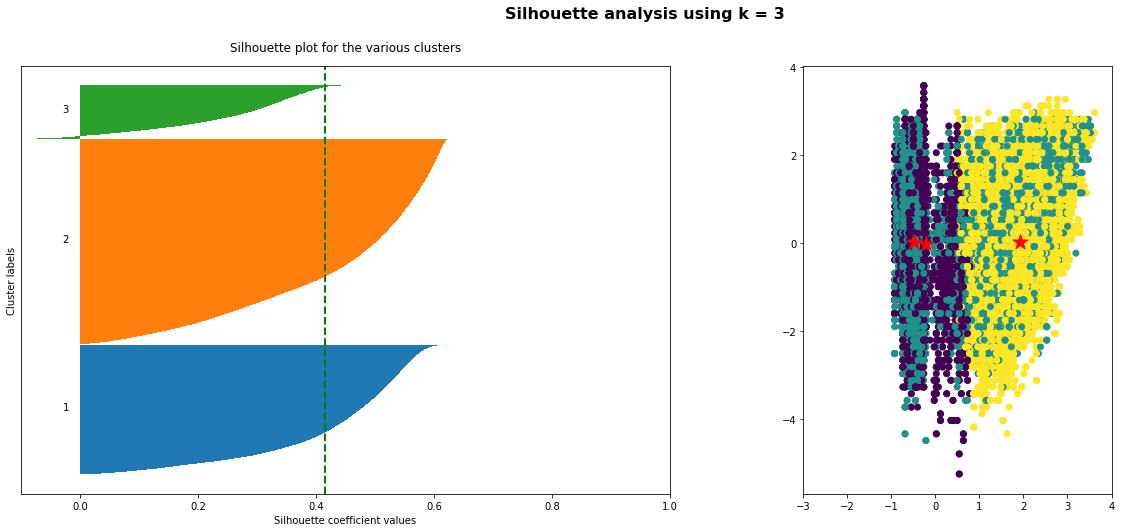

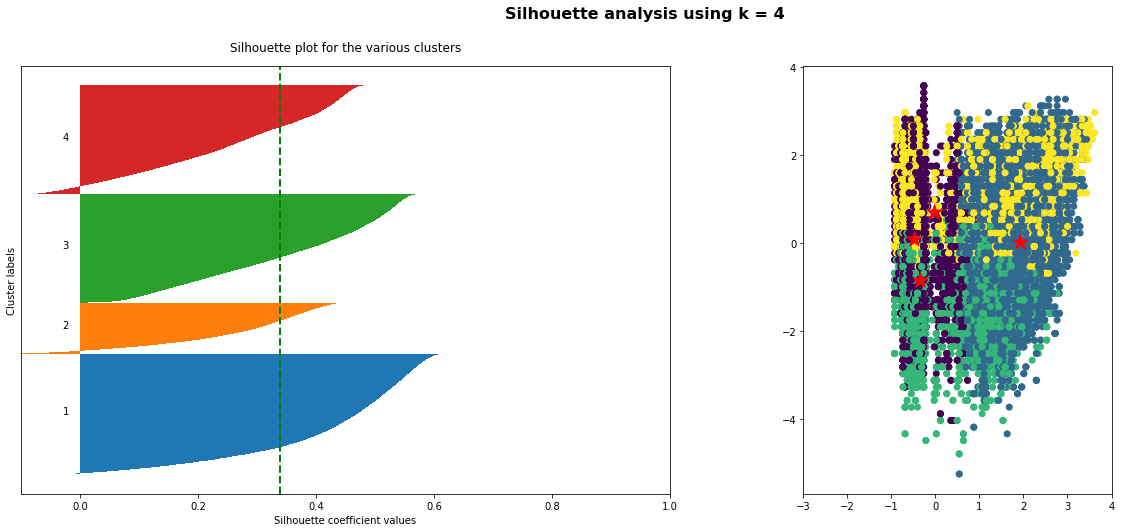

In [66]:
start = timeit.default_timer()
for i, k in enumerate([ 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-3, 4])
    ax2.set_xlim([-3, 4])
    ax2.set_xlabel('features scatter', color ='white')
    ax2.set_ylabel('features scatter', color ='white')
    ax2.set_title('Visualization of clustered data', y=1.02,  color ='white')
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    stop = timeit.default_timer()
print('Time: ', stop - start)  

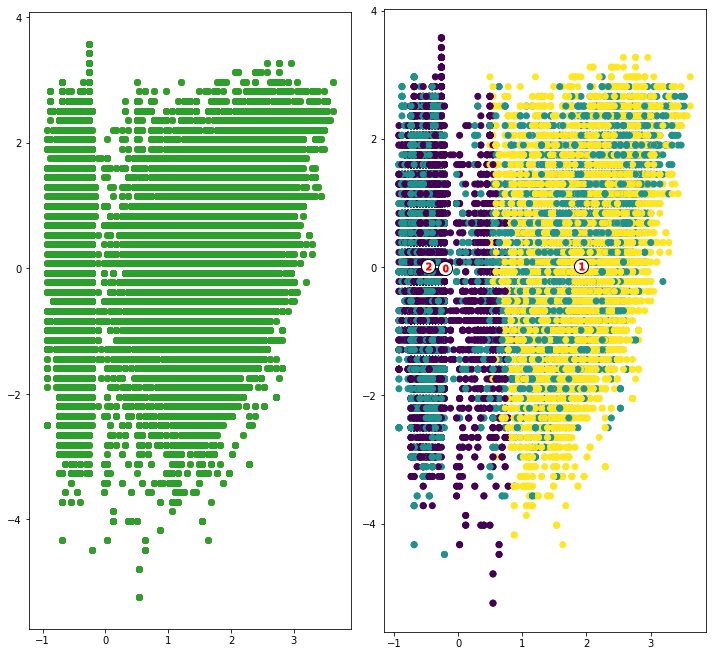

In [67]:
km = kmeans_model
km.fit(X_std)
labels = y_kmeans
centroids = km.cluster_centers_

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(X_std[:, 0], X_std[:, 1])
ax[0].scatter(X_std[:, 0], X_std[:, 1])
ax[0].scatter(X_std[:, 0], X_std[:, 1])
ax[0].set_aspect('equal')
ax[1].scatter(X_std[:, 0], X_std[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax[1].set_aspect('equal')
plt.tight_layout()

[[10.15416893 69.26449629 58.35666486 62.47046482 59.78780973]
 [10.37654233 73.67883888 21.91954925 23.97368233 26.26635047]
 [66.74822232 79.11841532 71.56537513 73.70889566 72.10999855]
 [63.56509031 72.11893877 18.04002098 18.45671888 22.81188638]
 [10.43903861 71.91940917 43.68618813 50.73717284 49.14498575]
 [10.1502867  79.00280963 75.53497706 78.61806193 77.50212156]
 [56.93030635 76.19474836 27.0095186  29.5892779  61.14781182]
 [10.60840641 74.09961553 29.52365113 35.37465981 38.17564474]
 [10.31789435 73.40395585 66.57397073 70.29783606 68.69881572]
 [54.95008557 70.80433542 57.28707929 59.46320593 57.10325157]]


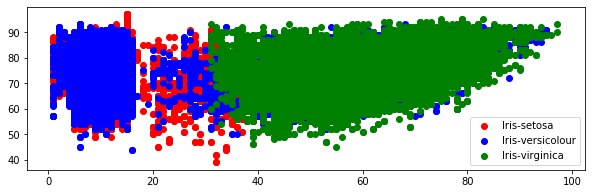

In [71]:
print(kmeans.cluster_centers_) #display cluster centers
plt.scatter(X[y_kmeans   == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans   == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans   == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.legend()
plt.show()


In [74]:
def pd_centers(featuresUsed, centers):
    from itertools import cycle, islice
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [75]:
pan = pd_centers(featuresUsed=fetures_selected, centers=kmeans_model.cluster_centers_)

In [76]:
pan

,gk_kicking,potential,marking,standing_tackle,interceptions,prediction
0,-0.200847,-0.019737,0.837049,0.836441,0.740941,0
1,1.917239,0.024828,-1.057033,-1.142763,-0.608754,1
2,-0.475368,0.021259,-0.899917,-0.863319,-0.932436,2


# Second Scenario

##### in this examination I try to predict overall rating by using other features

In [77]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [79]:
# call our dataset 
df2 = df.copy(deep = True)
#df_new = df_new.drop(labels=range(50000, 180354), axis=0)
df2 = df2.dropna()



The output or target in this model is chosen "overall_rating and" the rest of the data as features. To reduce the complexity of the model, I remove some features with high correlation( corr>90). And some non-numerical features were removed, such as "attacking_work_rate", "defensive_work_rate", "preferred_foot". 

In [80]:
df2.shape 

(180354, 42)

In [85]:
# remove meaningless and high correlation features
features_2 = df2.drop(['id', 'player_fifa_api_id','player_api_id',
                        'date', 'overall_rating', 'preferred_foot','attacking_work_rate' 
                        ,'ball_control', 'sprint_speed',"marking" ,'sliding_tackle','gk_diving',
                        'gk_handling','gk_positioning','gk_reflexes', 'defensive_work_rate'], axis=1)
features_2.shape


(180354, 26)

In [86]:
# this features just remove the columns with meaningless value and non numerical
features_2_n = df2.drop(['id', 'player_fifa_api_id','player_api_id','date','overall_rating', 'defensive_work_rate','attacking_work_rate' ], axis=1)
features_2_n.shape

(180354, 35)

In [87]:
features_2_n['preferred_foot'] = features_2_n['preferred_foot'].astype(float)

In [88]:
target = df2["overall_rating"]

### Note:
   - We train our model twice, the first time by deleting features with high correlation, in this case nine, to save time when analysing and avoid overfitting and a complex model.

- In the second attempt, we used all characteristics save those that were of no use.

In [92]:
X2 = features_2
X_2 = features_2_n
y2 = target

In [90]:
# building  model and fit it with training data
regressore = LinearRegression()

In [93]:
# split our data to train and test by using sklearn.model_selection function
# with removing high corrolation
xtrain, xtest, ytrain, ytest  = train_test_split(X2, y2, test_size = 0.30, random_state = 49)
start = timeit.default_timer()
regressore.fit(xtrain, ytrain)
y_pred = regressore.predict(xtest)
accuracy = r2_score(ytest, y_pred)
print(f"the score value is:  {accuracy:.4f}")

stop = timeit.default_timer()

print('Time: ', stop - start) 

the score value is:  0.7890
Time:  0.19474149999950896


In [94]:
# split our data to train and test by using sklearn.model_selection function
xtrain, xtest, ytrain, ytest  = train_test_split(X_2, y2, test_size = 0.30, random_state = 49)
start = timeit.default_timer()
regressore.fit(xtrain, ytrain)
y_pred = regressore.predict(xtest)
accuracy = r2_score(ytest, y_pred)
print(f"the score value is:  {accuracy:.4f}")

stop = timeit.default_timer()

print('Time: ', stop - start) 

the score value is:  0.8422
Time:  0.1220909000003303


In [95]:
print(ytrain.shape)
xtrain.shape

(126247,)


(126247, 35)

# Now we want to evaluate our model in different ways

### Firstly, evaluate Mean Absolute Error(MAE) 
The absolute difference between actual and predicted values is calculated using simple measures. One method for comparing predictions to their final results is to use mean absolute error(MAE). And well-established alternatives to the mean absolute scaled error (MASE) and the square mean error.

In [96]:
from sklearn.metrics import mean_absolute_error
MAE = (mean_absolute_error(ytest, y_pred))
print(f"the MAE value is:  {MAE:.4f}")

the MAE value is:  2.1346


#### What does  MAE represent to us?
It represents the average absolute difference between X and Y and also is comparable but not identical to root mean squared error (RMSE).

##### Advantages of MAE
- The MAE you get is in the same unit as the output variable.
- It is most Robust to outliers.

# Secondly, Mean Squared Error(MSE) 
MSE is another way to evaluate our model which is mean squared error states that finding the squared difference between actual and predicted value.
###### So, we calculated the absolute difference earlier, and now we're looking for the squared difference.



In [97]:
MSE = mean_squared_error(ytest, y_pred)
print(f'Mean squared error: {MSE:.4f}')


Mean squared error: 7.8163


#### what MSE represent to us?
actually this evaluate shows the squre distance between actual and predicted values. The MSE of zero (0) denotes flawless accuracy, which is not feasible. To avoid negative numbers in our output, we employ the square.


# Third evaluate are RMSE and RMSLE
The acronym RMSE indicates that it is a simple square root of mean squared error, This informs us the average gap between the model's predicted values and the dataset's actual values.The optimum score in evaluating is mainly reliant on the datasets we have available. The lower the RMSE, the better the model fits the data, although which number is lower depends on the dataset range.

Pros:
- The output value is in the same unit as the desired output variable, which simplifies loss interpretation.

cons: 
- It is not that robust to outliers as compared to MAE.

In [98]:
# RMSE (Root Mean Squared Error)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2.795757759954462


In [99]:
# to make the RMSE to rebust to outliers we implement log from RMSE
RMSElog = np.log(RMSE)
RMSElog

1.0281031825476192

For example, the RSME number is 3.2, which is not bad given my range data. However, we can use this formula to normalise the RMSE number between 0 and 1 to have a better understanding of this value.
### Normalized RMSE = RMSE / (max value – min value)

In [101]:
mini = min(df2["overall_rating"])
maxi = max(df2["overall_rating"])

In [102]:
NormalizedRMSE = RMSE / (maxi - mini)
print(f'Mean squared error: {NormalizedRMSE:.4f}')

Mean squared error: 0.0458


the value 0.053 is shows that my model accuracy is good and my model working well

In [103]:
# to make the RMSE to rebust to outliers we implement log from 
RMSElog = np.log(RMSE)
RMSElog

1.0281031825476192

# The Last way to evaluate is R Squared (R2):

A score of R2 is a measure of your model's performance, which is known as the Coefficient of Determination.


In [105]:
# Model Accuracy, how often is the classifier correct?
accuracy = r2_score(ytest, y_pred)
#test_score = regressore.score(xtest,ytest)
#print(train_score*100,'%')
print(f'Mean squared error: {accuracy:.4f}')

Mean squared error: 0.8422


### what does means R2 score
The R2 score ranges from 0 to 1, with a value approaching zero indicating that the regression and mean lines are equal and that overlapping occurs. The model's performance is poor in this scenario. When the R2 is 1, the regression is perfect and error-free, however this is impossible in the actual world.

# Enhancing accuracy 
There are three way to enhance a model and accuracy
    - More (high-quality) data should be used, as well as feature engineering.
    - Adjust the algorithm's hyperparameters.
    - Experiment with different algorithms.
       
we can impelement other model to enhance our model and accuracy such as SVM , DecisionTreeRegressor and RandomForestRegressor. Due to its vast size, the SVM model is not appropriate for this data set. This model takes too long to analyse and is only used for a small dataset on a regular basis.

# Decision Tree Regression

In terms of machine learning, the Decision Tree algorithm is a classification and regression algorithm connected to the supervised learning algorithm. Regression trees are decision trees in which the target variable can take continuous values (Letham et al., 2015). It uses tagged datasets to train the algorithm to categorise data. Input data and proper outputs are included in training procedures, which allows the model to learn.
ID3 JR Quinlan's approach to building decision trees in regression, which uses the ID3 algorithm to construct decision trees by replacing information gain with standard deviation reduction, performs continuous top-down searches in stable and irreversible branch space.


In [116]:
# define datafram
df_DR = df.copy(deep = True)
# of features chosen divide it into two sections: target and features
features_DR = df_DR.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
      'preferred_foot', 'attacking_work_rate','defensive_work_rate'], axis=1)
X_R = features_DR
y_r = df['overall_rating']

In [117]:
 # define a Decision tree Regression model 
# model_DR =  DecisionTreeRegressor(max_depth = 10)
model_DR =  DecisionTreeRegressor()
# split data into training and testing data to train algorithm
xtrain1, xtest1, ytrain1, ytest1  = train_test_split(X_R, y_r, test_size = 0.30, random_state = 49)

In [118]:
# define a time method to calculate the time consuming
start = timeit.default_timer()
# fit the model with data
model_DR.fit(xtrain1, ytrain1)
y_pred2 = model_DR.predict(xtest1)
accuracy = r2_score(ytest1, y_pred2)
print('Accuracy', round(accuracy, 3), '%.')
      
stop = timeit.default_timer()
print('Time: ', stop - start)      

Accuracy 0.96 %.
Time:  3.0444251999997505


### Optimasing DT model 

Accuracy is directly proportional to maximum depth; however, after 10 or 12 layouts, this line will not shift significantly, and Accuracy will be reduced by raising the "min sample split."
So, in order to optimise our model, we choose 11 as the maximum depth and two as the minimum sample split , and the accuaracy of model is about 0.90, which is excellent which was far better than the previous model Linear Regression (0.78). The DT model works better and has more accuracy can be explained by its structure and employed Varian reduction and the "squared_error" as a criterion. Also, DT can use a technique such as a hiearachy system to split and separate input features into several isolated nodes to classify. Moreover, Linear regression generally assumes input features to be mutually independent, but DT has a different method. 


In [ ]:
max_depth = []
Accuracy = []
max_error = []
for i in range(1,30):
    dtree = DecisionTreeRegressor( max_depth=i )
    dtree.fit(xtrain, ytrain)
    pred = dtree.predict(xtest)
    accuracy = r2_score(ytest, pred)
    Accuracy.append(accuracy)
    max_depth.append(i)
    #print(accuracy)
d = pd.DataFrame({'Accuracy':pd.Series(Accuracy),
                  
                  'max_depth':pd.Series(max_depth)})
plt.plot('max_depth','Accuracy', data=d, label='Accuracy')

plt.xlabel('max_depth', color= "white")
plt.ylabel('Accuracy', color = "white")
plt.tick_params(axis='x', colors='white') 
plt.tick_params(axis='y', colors='white') 
plt.grid(axis = 'x')
plt.legend()


In [ ]:
min_samples_split = []
Accuracy2 = []
for i in range(2,20,1):
 dtree = DecisionTreeRegressor( min_samples_split=i )
 dtree.fit(xtrain, ytrain)
 pred2 = dtree.predict(xtest)
 accuracy2 = r2_score(ytest, pred2)
 Accuracy2.append(accuracy2)
 ####
 min_samples_split.append(i)
d = pd.DataFrame({'Accuracy2':pd.Series(Accuracy2), 
 'min_samples_split':pd.Series(min_samples_split)})
# visualizing changes in parameters
plt.plot('min_samples_split','Accuracy2', data=d, label='Accuracy2')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title("Min_Samples_split", color = "Red")
plt.grid(axis = 'x')
plt.xlabel('min_samples_split', color= "white")
plt.ylabel('Accuracy', color = "white")
plt.tick_params(axis='x', colors='white') 
plt.tick_params(axis='y', colors='white')
plt.legend()

In [ ]:
# Optimisation of model
model_O =  DecisionTreeRegressor(min_samples_split = 2,max_depth= 11 )

In [ ]:
start = timeit.default_timer()
# fit the model with data
model_O.fit(xtrain1, ytrain1)
y_pred_O = model_O.predict(xtest1)
accuracy = r2_score(ytest1, y_pred_O)
print('Accuracy', round(accuracy, 3), '%.')
      
stop = timeit.default_timer()
print('Time: ', stop - start)  

# way 2  Random Forest
Random Forest is a prominent machine learning model that has been utilised in many academic articles for categorization challenges. Random forests can be utilised for regression work in addition to classification. A random forest's nonlinear nature might aid it with linear techniques, making it a fantastic option. In overall, when employed on large data sets, this technique produces superior results, and it can operate with missing data by estimating it. They do, however, provide a significant issue in that they are unable to extrapolate data that is not apparent 

In [89]:
from sklearn.ensemble import RandomForestRegressor
df_R = df.copy(deep = True)




In [148]:
# define random forest model
model_RF = RandomForestRegressor(n_estimators = 10, random_state = 49)
# removing some columns that are not numerical 
features_R = df_R.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
      'preferred_foot', 'attacking_work_rate','defensive_work_rate'], axis=1)
X = features_R
y = df['overall_rating']
# split our data to train and test by using sklearn.model_selection function
xtrain, xtest, ytrain, ytest  = train_test_split(X, y, test_size = 0.30, random_state = 49)

In [149]:
X.shape

(180354, 34)

In [155]:
 # inport time to caculate time consuming of model

start = timeit.default_timer()
# train model with dataset 
model_RF.fit(xtrain, ytrain)
# evaluate the model and find accuracy
predictions = model_RF.predict(xtest) 
errors = abs(predictions - ytest)
mape = np.mean(100 * (errors / ytest))

accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

score = model_RF.score(xtest,ytest)
print('Score:', round(score, 2), '%.')
stop = timeit.default_timer()

print('Time: ', stop - start) 

Accuracy: 99.12 %.
Score: 0.98 %.
Time:  22.00210420000076


### Notice
In this case, as shown the Random forest was choose, and the model's accuracy and score were quite high. Random forest is also a strong feature selection method that may be used to identify the most essential and relevant input attributes for output. In other words, we can avoid employing too many features and lower not only the model's complexity but also the time it takes to analyse it.

In [96]:
# finding the features that are more important for model 
feature_imp = pd.Series(model_RF.feature_importances_,index=features_R.columns).sort_values(ascending=False)


No handles with labels found to put in legend.


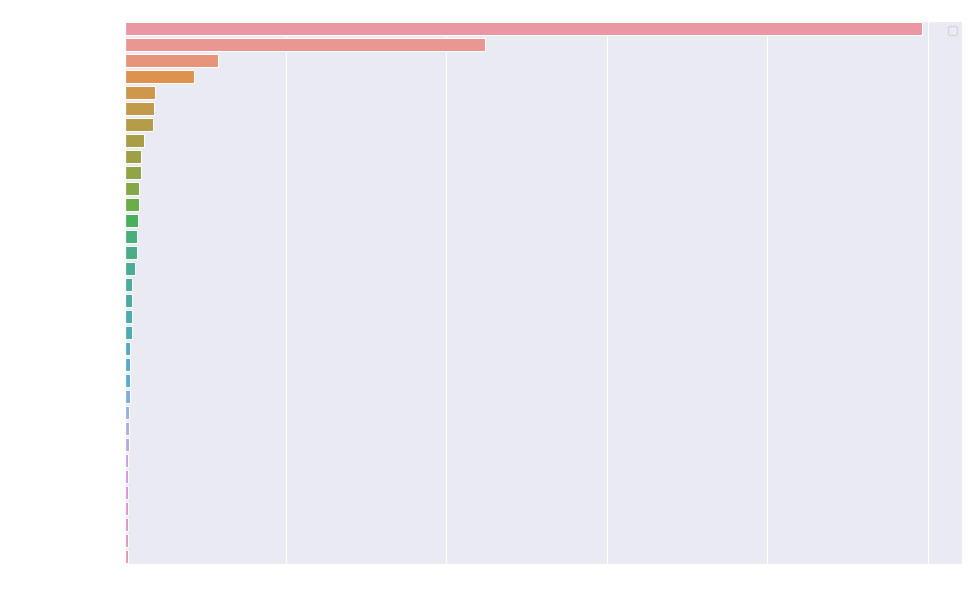

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score', color = "white")
plt.ylabel('Features', color = "white",)
plt.title("Visualizing Important Features", color = 'white')
plt.tick_params(axis='x', colors='white') 
plt.gcf().set_size_inches(15, 10)
fig.set_figheight(6)
fig.set_figwidth(8)
plt.tick_params(axis='y', colors='white')

plt.legend()

plt.show()

We'll use an arbitrary threshold of 95% here, but we can adjust it if it leads to poor performance. First, we must determine the exact number of traits that are more important than 95 percent of the time:

In [154]:
#  List of tuples with variable and importance
#feature_importances = [(features, round(feature_imp,3)) for features, feature_imp in zip(feature_list, importances)]

cumulative_importances = np.cumsum(feature_imp)
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 16


In [156]:
importances = list(model_RF.feature_importances_)
feature_list = list(features_R)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [157]:
important_feature_names = [feature[0] for feature in feature_importances[0:14]]
X2 = df_R[important_feature_names]


xtrain2, xtest2, ytrain2, ytest2  = train_test_split(X2, y, test_size = 0.30, random_state = 49)
regressor3 = RandomForestRegressor(n_estimators = 10, random_state = 49)

In [159]:
X2.shape

(180354, 14)

In [158]:
start = timeit.default_timer()
regressor3.fit(xtest2,ytest2)
regressor3.score(xtest2,ytest2)
predictions2 = regressor3.predict(xtest2) 
errors2 = abs(predictions2 - ytest2)
mape2 = np.mean(100 * (errors2 / ytest2))
accuracy2 = 100 - mape2
print('Accuracy2:', round(accuracy2, 2), '%.')
#Your statements here
score = regressor3.score(xtest2,ytest2)
print('Score:', round(score, 2), '%.')
stop = timeit.default_timer()

print('Time: ', stop - start) 

Accuracy2: 99.44 %.
Score: 0.99 %.
Time:  3.578788499999064


# Third Scenario

In [39]:
df3.shape

(25979, 115)

In [40]:
df3.dropna(inplace =True)

In [41]:
columns = ['id','country_id', 'league_id', 'stage', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 
           'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 
           'IWD', 'IWA', 'LBH', 'LBD', 'LBA',  'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 
           'SJA', 'VCH', 'VCD', 'VCA', ]

In [42]:
X = df3.copy(deep = True)

In [43]:
X = X[columns]

In [44]:
# define a function to determine the result of match with binary 
def matchresult(homeScore, awayScore):
    if(homeScore > awayScore):
        return 1
    elif(homeScore < awayScore):
        return 2
    else:
        return 0

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [45]:
X.columns

Index(['id', 'country_id', 'league_id', 'stage', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD',
       'SJA', 'VCH', 'VCD', 'VCA'],
      dtype='object')

In [46]:
X['result'] = df3.apply(lambda r: matchresult(r['home_team_goal'], r['away_team_goal']), axis=1)
y = X['result']
#Discard the features, so as not to impair the accuracy of the model
X = X.drop('result',1)
X = X.drop('home_team_goal',1)
X = X.drop('away_team_goal',1)

In [47]:
#Discard the features, so as not to impair the accuracy of the model
X = X.drop(['id', 'country_id', 'league_id', 'stage', 'match_api_id',
       'home_team_api_id', 'away_team_api_id'], axis=1)

In [48]:
y.head(3)

3248    0
3249    1
3250    1
Name: result, dtype: int64

In [49]:
xtrain3,xtest3, ytrain3,ytest3 = train_test_split(X,y,test_size = 0.40, random_state= 41)

In [50]:
model = RandomForestClassifier()
model.fit(xtrain3 ,ytrain3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
score = model.score(xtest3, ytest3)
score

0.46382978723404256

### Features importance for third examination

In [20]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


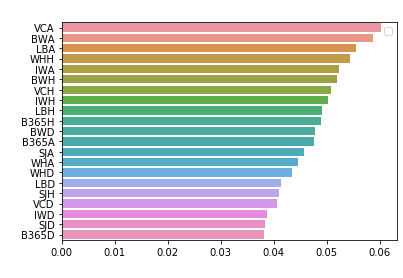

In [21]:
# Represent the most representative characteristics for the model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', color = "white")
plt.ylabel('Features', color = "white")
plt.title("Visualizing Important Features", color = "white")
plt.legend()
plt.show()



In [52]:
def Evaluation_Models(X, y):
   
    #Name of the different classification algorithms used in the tests
    names = ["Decision Tree", "Random Forest",  "AdaBoost", "Naive Bayes"]

    classifiers = [
        
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GaussianNB(),
        ]
    X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X, y, test_size=.40, random_state=0)
    
    # Iterar sobre clasificadores
    for name, clf in zip(names, classifiers):
        clf.fit(X_train_N, y_train_N)
        score = clf.score(X_test_N, y_test_N)
   
        print("%s: \n   %f" % (name, score))

In [53]:
Evaluation_Models(X, y)

Decision Tree: 
   0.398582
Random Forest: 
   0.451064
AdaBoost: 
   0.480851
Naive Bayes: 
   0.431206


In [54]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(xtrain3, ytrain3) 
y_pred = clf.predict(xtest3)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?


In [55]:
print("Accuracy:",metrics.accuracy_score(ytest3, y_pred))

Accuracy: 0.5092198581560283
